# Calculating remaining useful life

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


This rule is based on the temperature of the stator winding, which is expected to reach the highest temperatures inside the motor. We consider a threshold of 130 degrees Celsius, over which the motor is considered to be degrading faster than usual due to the temperature 

In [6]:
df['red'] = (1/2)**((df['stator_winding'] - 130)/10)
df['red'].loc[df['red'] > 1] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_3056\3359279396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['red'].loc[df['red'] > 1] = 1


A 'reduction' column is added to the dataset, with values ranging from 0 to 1 representing a percentage of degradation due to temperature at each point in time. Reduction values are averaged over a period of an hour and then multiplied by the remaining useful life in hours at each interval. We used 50000 hours as the starting value, based on common measurements for similar motors

In [7]:
window = 7200   # 1h
df['rul'] = 50000
for i in range(df.index.size):
    if i % window == 0 and i != 0:
        avg_red = df['red'].iloc[i-window:i].mean()
        df['rul'].iloc[i-window:i] = df['rul'].iloc[i-window-1] * avg_red - 1.39e-3*window

n = df.index.size % window
df['rul'].iloc[-n:] = df['rul'].iloc[-n-1] * df['red'].iloc[-n:].mean() - 1.39e-3*window

C:\Users\User\AppData\Local\Temp\ipykernel_3056\366584397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rul'].iloc[i-window:i] = df['rul'].iloc[i-window-1] * avg_red - 1.39e-3*window


Text(0, 0.5, 'Remaining Useful Life (h)')

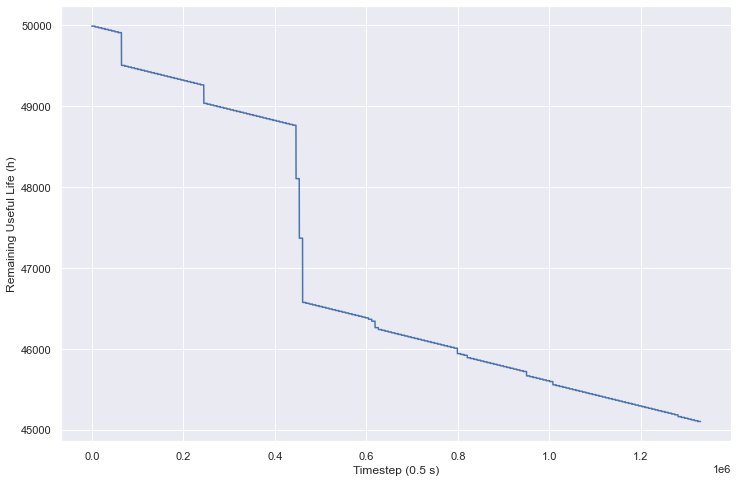

In [32]:
import seaborn as sns

sns.set()

ax = df.rul.plot(figsize=(12,8))
ax.set_xlabel('Timestep (0.5 s)')
ax.set_ylabel('Remaining Useful Life (h)')

In [9]:
# df[['profile_id','red','rul']].to_csv('test.csv')

In [10]:
# df.to_csv('measures_rul.csv')